In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #{x_1, x_2, ...} x_scal_i = (x_i - mean(x)) / var(x)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV

In [4]:
data = pd.read_csv(r"C:\Users\raket\Downloads\used_cars.csv")

In [5]:
data.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"


In [6]:
data.shape

(4009, 12)

In [7]:
data.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [8]:
data.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [9]:
data.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [12]:
Вижу, что dtype объект и стараюсь понять какие можно поменять. из очевидного цена и мили

SyntaxError: invalid syntax (4063485986.py, line 1)

In [13]:
data['milage'] = (
    data['milage']
    .str.replace(' mi.', '', regex=False)
    .str.replace(',', '', regex=False)
)

data['milage'] = pd.to_numeric(data['milage'], errors='coerce')


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   int64 
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(2), object(10)
memory usage: 376.0+ KB


In [15]:
current_year = 2026
data['age'] = current_year - data['model_year']

In [16]:
data["milage"].dtype


dtype('int64')

In [17]:
data["milage"] = (
    data["milage"]
    .str.replace(r"[^0-9]", "", regex=True)
)
data["milage"] = pd.to_numeric(data["milage"], errors="coerce")


AttributeError: Can only use .str accessor with string values!

In [ ]:
data["milage"].dtype


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   int64 
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
 12  age           4009 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 407.3+ KB


In [19]:
data["price"] = (
    data["price"]
    .str.replace(r"[^0-9]", "", regex=True)
)
data["price"] = pd.to_numeric(data["price"], errors="coerce")
data["price"].dtype
data["price"].isna().sum()


np.int64(0)

In [20]:
data["milage_per_year"] = data["milage"] / (data["age"] + 1)

In [21]:
ввел переменную мили за год

SyntaxError: invalid syntax (3643290657.py, line 1)

In [22]:
data["engine_volume"] = (
    data["engine"]
    .str.extract(r"(\d+\.\d+)")
    .astype(float)
)
data["cylinders"] = (
    data["engine"]
    .str.extract(r"(I\d|V\d)")
)
data["is_electric"] = data["engine"].str.contains("Electric", na=False).astype(int)

In [23]:
добавил флаги о наличии и отсутствии инцидентов тип переключения передач и выбрал марки luxury_brands для теста

SyntaxError: invalid syntax (854543897.py, line 1)

In [27]:
data["accident_flag"] = data["accident"].str.contains("accident", case=False, na=False).astype(int)
data["clean_title_flag"] = data["clean_title"].str.contains("Yes", na=False).astype(int)
data["is_automatic"] = data["transmission"].str.contains("Auto", case=False, na=False).astype(int)
luxury_brands = ["BMW", "Mercedes", "Audi", "Lexus", "Porsche"]

data["is_luxury"] = data["brand"].isin(luxury_brands).astype(int)


In [ ]:
sns.histplot(data["price"], bins=50)
plt.show()

sns.histplot(np.log(data["price"]), bins=50)
plt.show()

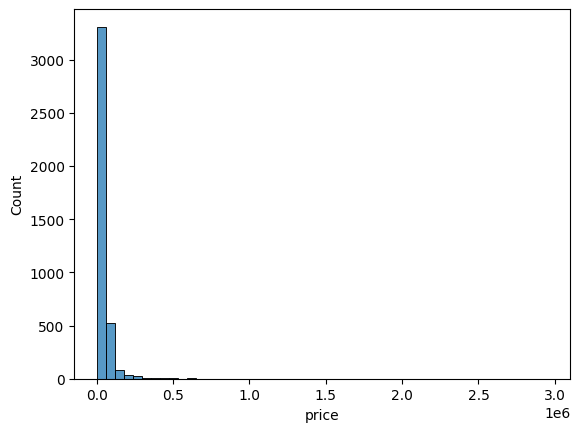

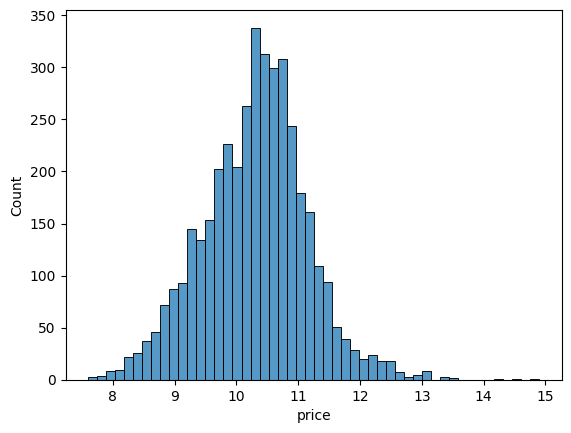

In [ ]:
где-то слишком большая цена поэтому использую лог прайс

In [29]:
data.isna().sum()

brand                  0
model                  0
model_year             0
milage                 0
fuel_type            170
engine                 0
transmission           0
ext_col                0
int_col                0
accident             113
clean_title          596
price                  0
age                    0
milage_per_year        0
engine_volume        103
accident_flag          0
cylinders           2617
is_electric            0
clean_title_flag       0
is_automatic           0
is_luxury              0
dtype: int64

In [2]:
numeric_cols = data.select_dtypes(include=np.number).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

NameError: name 'data' is not defined

In [1]:
заметил, что у моей новой величины age коэффициент корреляции противоположный model_year поэтому он лишен смысла, разве что для 
большего удобства

SyntaxError: invalid syntax (1727545501.py, line 1)

In [33]:
data["accident"].value_counts()
data["clean_title"].value_counts()


clean_title
Yes    3413
Name: count, dtype: int64

In [34]:
for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].fillna("Unknown")


In [39]:
data["age"] = 2026 - data["model_year"]
data["milage_per_year"] = data["milage"] / (data["age"] + 1)
data["log_price"] = np.log(data["price"])


In [40]:
X = data.drop(columns=["price", "log_price"])
y = data["log_price"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [58]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

In [59]:
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include="object").columns

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [ ]:
модель 1 - линейная регрессия

In [60]:
data = data.fillna(0)
pipe_lr = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)


In [ ]:
модель 2 - ридж

In [61]:
pipe_ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge())
])

pipe_ridge.fit(X_train, y_train)
y_pred_ridge = pipe_ridge.predict(X_test)


In [ ]:
модель 3 - дерево решений

In [62]:
pipe_tree = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

pipe_tree.fit(X_train, y_train)
y_pred_tree = pipe_tree.predict(X_test)


In [ ]:
функция оценки

In [63]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error,
    max_error
)

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f"========== {name} ==========")
    
    print("\n--- TRAIN ---")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2:", r2_score(y_train, y_pred_train))
    
    print("\n--- TEST ---")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2:", r2_score(y_test, y_pred_test))
    
    print("\nДоп. метрики (TEST):")
    print("Median AE:", median_absolute_error(y_test, y_pred_test))
    print("Max error:", max_error(y_test, y_pred_test))
    
    print("\nРазница R2 (overfitting check):",
          r2_score(y_train, y_pred_train) - r2_score(y_test, y_pred_test))


In [ ]:
оценки модели линейной регрессии

In [64]:
evaluate_model("Linear Regression", pipe_lr, X_train, X_test, y_train, y_test)

========== Linear Regression ==========

--- TRAIN ---
MAE: 0.038318854943570124
RMSE: 0.07952073387275525
R2: 0.9910736153550335

--- TEST ---
MAE: 0.24061590038265473
RMSE: 0.4347870829006511
R2: 0.7572531423972246

Доп. метрики (TEST):
Median AE: 0.15301047471911566
Max error: 5.134085558898381

Разница R2 (overfitting check): 0.23382047295780883


In [ ]:
оценка ридж модели

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

models_reg = {
    'OLS': LinearRegression(),
    'Ridge (α=1)': Ridge(alpha=1),
    'Ridge (α=100)': Ridge(alpha=100),
    'Lasso (α=1)': Lasso(alpha=1),
    'Lasso (α=100)': Lasso(alpha=100),
    'ElasticNet': ElasticNet(alpha=1, l1_ratio=0.5),
}

results_reg = []
for name, model in models_reg.items():
    model.fit(X_train_reg_sc, y_train_reg)
    y_pred = model.predict(X_test_reg_sc)
    results_reg.append({
        'Model': name,
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred)),
        'MAE': mean_absolute_error(y_test_reg, y_pred),
        'R²': r2_score(y_test_reg, y_pred),
    })

pd.DataFrame(results_reg).set_index('Model').round(2)

NameError: name 'X_train_reg_sc' is not defined

In [66]:
evaluate_model("Ridge", pipe_ridge, X_train, X_test, y_train, y_test)

========== Ridge ==========

--- TRAIN ---
MAE: 0.09474789247017767
RMSE: 0.13501810283006077
R2: 0.9742665010371578

--- TEST ---
MAE: 0.21162268827207942
RMSE: 0.3970122122482566
R2: 0.7976011305144216

Доп. метрики (TEST):
Median AE: 0.13822479758787587
Max error: 5.113822781875065

Разница R2 (overfitting check): 0.17666537052273623


In [ ]:
оценка дерева решений

In [67]:
evaluate_model("Decision Tree", pipe_tree, X_train, X_test, y_train, y_test)

========== Decision Tree ==========

--- TRAIN ---
MAE: 0.0
RMSE: 0.0
R2: 1.0

--- TEST ---
MAE: 0.3187063829202431
RMSE: 0.47315651704434153
R2: 0.7125184334142453

Доп. метрики (TEST):
Median AE: 0.23465264777761607
Max error: 4.435738366050016

Разница R2 (overfitting check): 0.28748156658575474


In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipe_ridge, X, y, cv=kf, scoring="neg_root_mean_squared_error")

print("CV RMSE:", -scores.mean())


CV RMSE: 0.3135311823982283


In [69]:
param_grid = {
    "model__alpha": [0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe_ridge, param_grid, cv=5, scoring="neg_root_mean_squared_error")

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)


Best params: {'model__alpha': 1}


In [70]:
pipe_lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Lasso(alpha=0.01))
])

pipe_lasso.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co